In [114]:
data_frame = pd.read_csv("D:\PyProjects\Lab1\output.csv", ";")

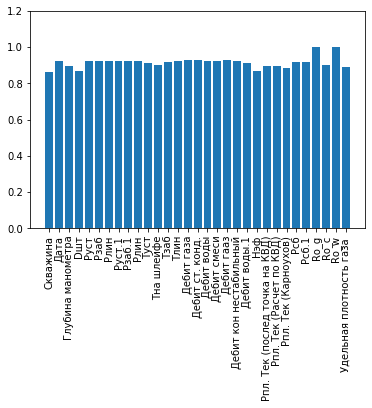

In [118]:
import csv
import sys
import pandas as pd
import seaborn as sb

from collections import defaultdict
from math import log

import matplotlib.pyplot as plt

# подсчет частоты классов
# возвращает мапу из тапла классов в качестве ключа и частоты в качестве значения
def calculate_class_frequencies(rows):
    frequency = defaultdict(float)
    for row in rows:
        key = tuple(row[positions_to_check[-1]:])
        frequency[key] += 1
    return frequency

# считаем инфо для всей выборки
def calculate_info(rows):
    sum = 0.0
    for frequency in calculate_class_frequencies(rows).values():
        probability = frequency / len(rows)
        sum += probability * log(probability, 2)

    return -sum

# входной параметр эта мапа из [значение атрибута : соответствующие строки выборки]
# считаем сплит инфо для каждого атрибута
def calculate_split_info(attribute_groups):
    sum = 0.0
    for group in attribute_groups.values():
        probability = len(group) / len(lines)
        sum += probability * log(probability, 2)
    return -sum

# входной параметр эта мапа из [значение атрибута : соответствующие строки выборки]
# считаем инфо_а для каждого атрибута
def calculate_attribute_info(attribute_groups):
    sum = 0.0
    for group in attribute_groups.values():
        probability = len(group) / len(lines)
        sum += probability * calculate_info(group)
    return sum


def calculate_gain_ratio(groups):
    # print(f'info gain: {info - calculate_attribute_info(groups)} split info {calculate_split_info(groups)}')
    return (info - calculate_attribute_info(groups))/calculate_split_info(groups)

positions_check_count = 2
positions_to_check = [-1 * i for i in range(1, positions_check_count + 1)]

with open("D:\PyProjects\Lab1\output.csv", 'r', encoding="unicode_escape") as input_file:
    reader = csv.reader(input_file, delimiter=';')
    columns_count = len(next(reader)) + positions_to_check[-1]
    lines = list(reader)

groups_by_attribute = [defaultdict(list) for _ in range(columns_count)]
for line in lines:
    for attribute_index in range(columns_count ):
        attribute_group = groups_by_attribute[attribute_index]
        attribute_group[line[attribute_index]].append(line)

info = calculate_info(lines)
gain_ratios = []
for group_by_attribute in groups_by_attribute:
    gain_ratios.append(calculate_gain_ratio(group_by_attribute))


plt.plot()
plt.xticks(rotation='vertical')
plt.bar(list(data_frame)[:positions_to_check[-1]], height=gain_ratios, width=0.8)
plt.ylim(0, 1.2)
plt.show()

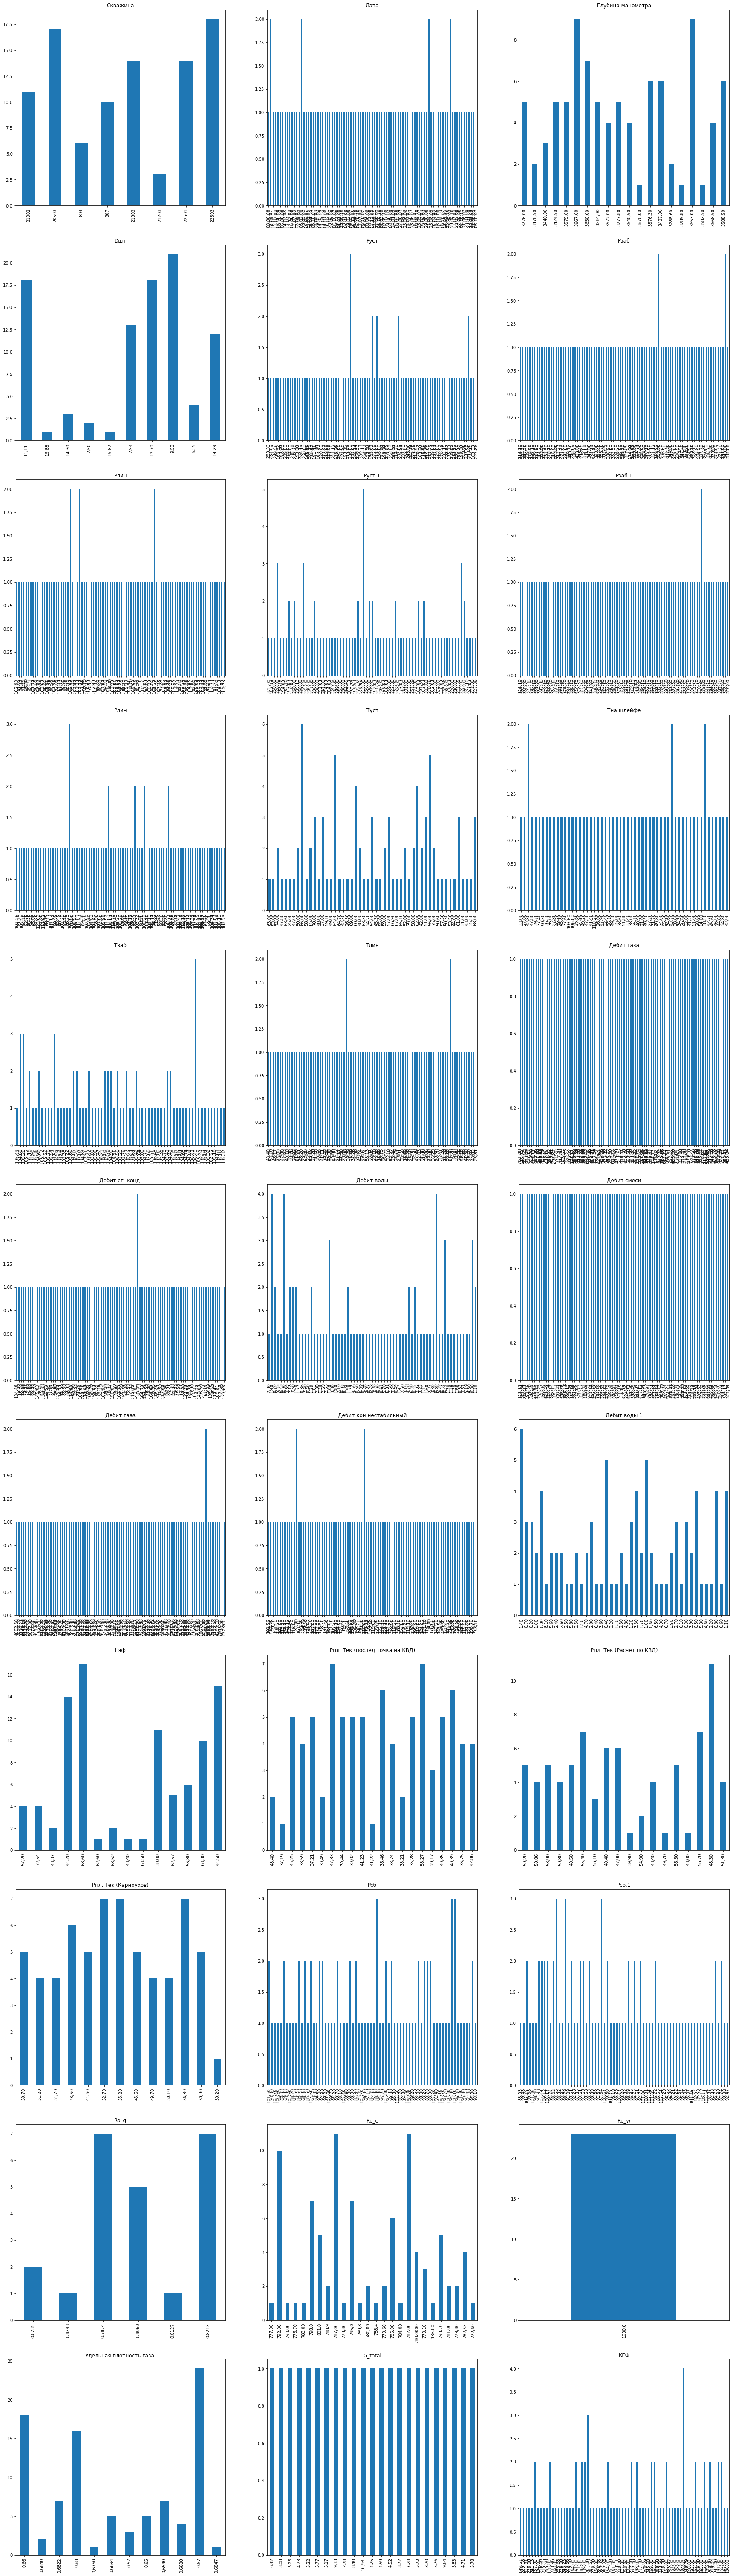

In [53]:
figure = plt.figure(figsize=(30,120))
i = 1
for column in data_frame:
    figure.add_subplot(12, 3, i)
    i += 1
    axes = data_frame[column].value_counts(sort=False).plot.bar(subplots=True)


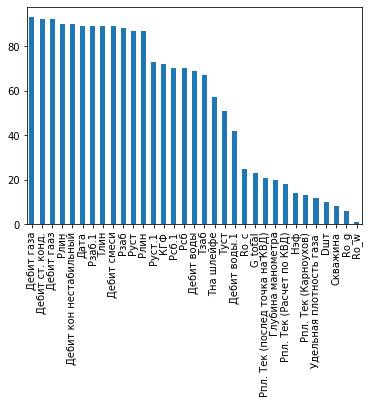

In [120]:
data_frame.nunique().sort_values(ascending=False).plot.bar()

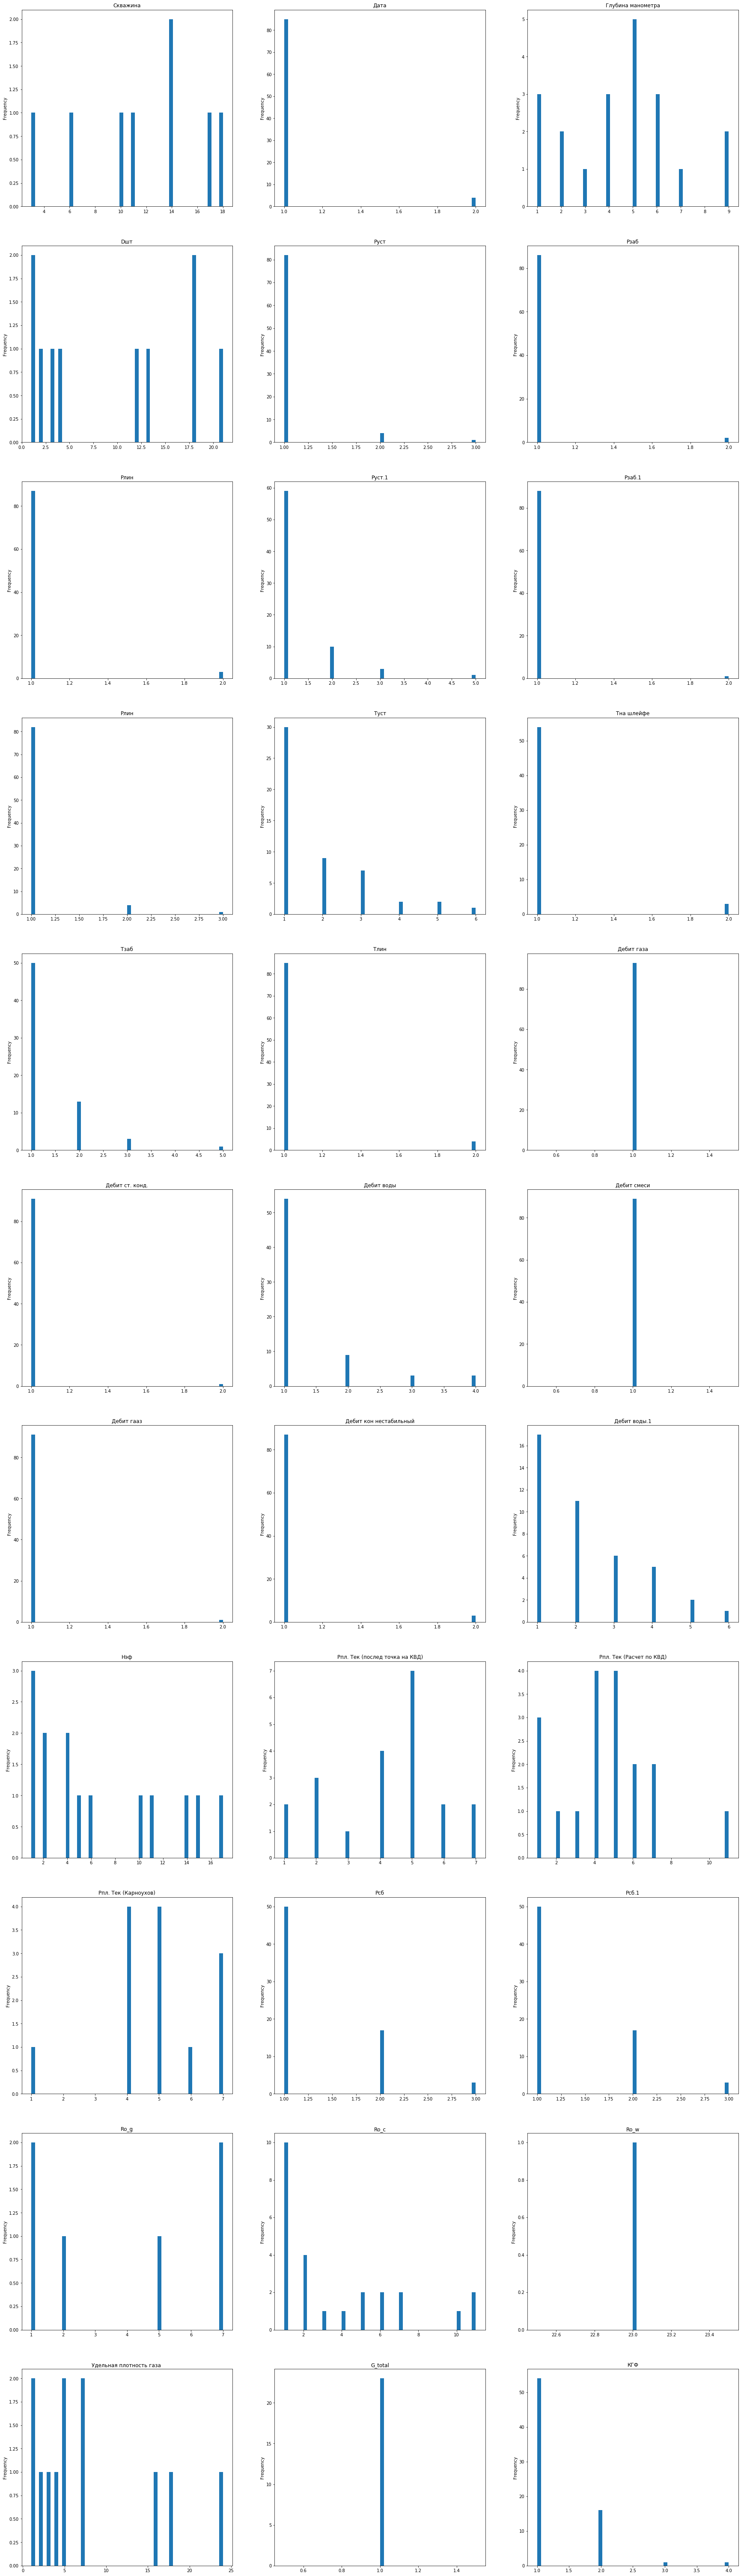

In [121]:
figure = plt.figure(figsize=(30,120))
i = 1
for column in data_frame:
    figure.add_subplot(12, 3, i)
    axes = data_frame[column].value_counts(sort=False).plot(kind='hist',title=column, bins=50)
    i += 1

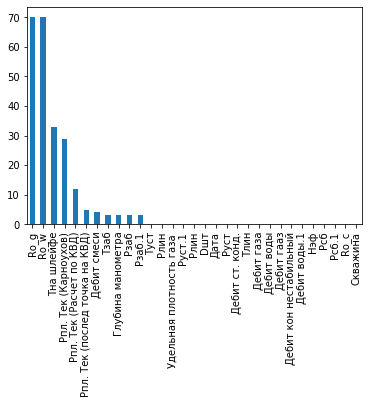

In [89]:
# в iloc первый слайс - строки, второй - колонки
nan_count = data_frame.iloc[:, : positions_to_check[-1]].isnull().sum()
nan_count.sort_values(ascending=False).plot.bar()

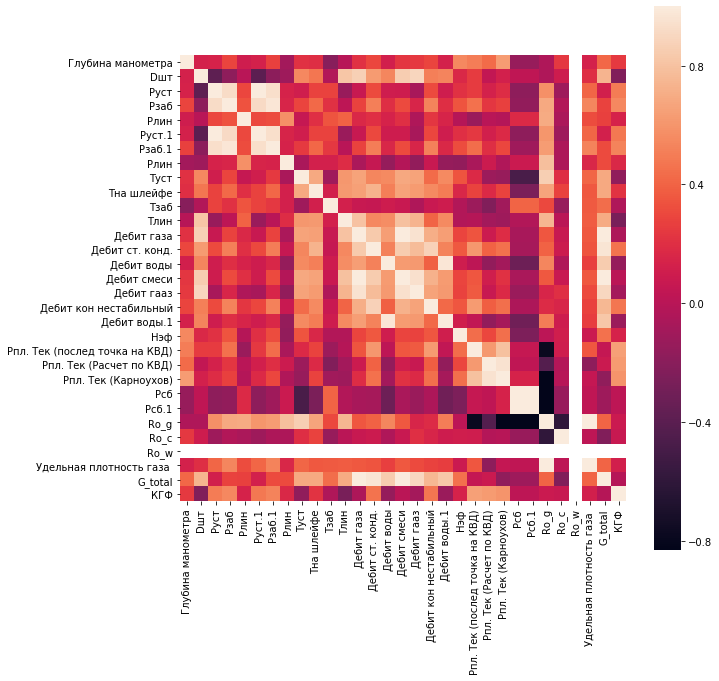

In [132]:
plt.figure(figsize=(10,10))
corr = data_frame.iloc[:, 1:].corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True)